Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie,axis,show
import plotly.offline as pyo
from plotly.offline import iplot
import cufflinks as cf
cf.go_offline()
import warnings
warnings.filterwarnings("ignore")
import plotly.io as pio
pio.renderers.default='colab'
import seaborn as sns

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Data

In [ ]:
# Reading the files
covid_data= pd.read_csv("/content/gdrive/MyDrive/archive/complete.csv")
district_data = pd.read_csv("/content/gdrive/MyDrive/archive/district_level_latest.csv")
national_data = pd.read_csv("/content/gdrive/MyDrive/archive/nation_level_daily.csv")
state_data = pd.read_csv("/content/gdrive/MyDrive/archive/state_level_latest.csv")

# Cleaning

---



# District Level Data

In [ ]:
district_data

,SlNo,State_Code,State,District_Key,District,Confirmed,Active,Recovered,Deceased,Migrated_Other,Delta_Confirmed,Delta_Active,Delta_Recovered,Delta_Deceased,District_Notes,Last_Updated
0,0,UN,State Unassigned,UN_Unassigned,Unassigned,0,0,0,0,0,0,0,0,0,NaN,NaN
1,1,AN,Andaman and Nicobar Islands,AN_Nicobars,Nicobars,0,0,0,0,0,0,0,0,0,District-wise numbers are out-dated as cumulat...,NaN
2,2,AN,Andaman and Nicobar Islands,AN_North and Middle Andaman,North and Middle Andaman,1,0,1,0,0,0,0,0,0,District-wise numbers are out-dated as cumulat...,NaN
3,3,AN,Andaman and Nicobar Islands,AN_South Andaman,South Andaman,51,19,32,0,0,0,0,0,0,District-wise numbers are out-dated as cumulat...,NaN
4,0,AP,Andhra Pradesh,AP_Foreign Evacuees,Foreign Evacuees,434,0,434,0,0,0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,760,TG,Telangana,TG_Unknown,Unknown,457,-51654,51552,559,0,0,0,0,0,NaN,NaN
796,761,TR,Tripura,TR_Unknown,Unknown,0,0,0,0,0,0,0,0,0,NaN,NaN
797,762,UP,Uttar Pradesh,UP_Unknown,Unknown,0,0,0,0,0,0,0,0,0,NaN,NaN
798,763,UT,Uttarakhand,UT_Unknown,Unknown,0,0,0,0,0,0,0,0,0,NaN,NaN


In [ ]:
# Rename the columns
district_data.rename(columns={'Deceased':'Deaths'},inplace=True)

In [ ]:
# To count the missing Values
district_data.isna().sum()

SlNo                 0
State_Code           0
State                0
District_Key         0
District             0
Confirmed            0
Active               0
Recovered            0
Deaths               0
Migrated_Other       0
Delta_Confirmed      0
Delta_Active         0
Delta_Recovered      0
Delta_Deceased       0
District_Notes     740
Last_Updated       800
dtype: int64

In [ ]:
# Drop the column containing NaN values
district_data = district_data.drop(['District_Notes','Last_Updated'],axis=1)   

In [ ]:
district_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   SlNo             800 non-null    int64 
 1   State_Code       800 non-null    object
 2   State            800 non-null    object
 3   District_Key     800 non-null    object
 4   District         800 non-null    object
 5   Confirmed        800 non-null    int64 
 6   Active           800 non-null    int64 
 7   Recovered        800 non-null    int64 
 8   Deaths           800 non-null    int64 
 9   Migrated_Other   800 non-null    int64 
 10  Delta_Confirmed  800 non-null    int64 
 11  Delta_Active     800 non-null    int64 
 12  Delta_Recovered  800 non-null    int64 
 13  Delta_Deceased   800 non-null    int64 
dtypes: int64(10), object(4)
memory usage: 87.6+ KB


In [ ]:
# To check all the  negative values in columns
check = {}
for columns in district_data:
  if district_data[columns].dtypes == "int64":
    s = district_data[columns].lt(0).sum()
    check[columns]=s
print(check)

{'SlNo': 0, 'Confirmed': 0, 'Active': 5, 'Recovered': 0, 'Deaths': 0, 'Migrated_Other': 0, 'Delta_Confirmed': 2, 'Delta_Active': 201, 'Delta_Recovered': 2, 'Delta_Deceased': 1}


In [ ]:
#To convert negative values to abs:
for key in check:
  if check[key] != 0:
    district_data[key] = district_data[key].abs()

In [ ]:
# To verify whether values are still negative or not: 
verify={}
for columns in district_data:
  if district_data[columns].dtypes == "int64":
    s = district_data[columns].lt(0).sum()
    verify[columns]=s
print(verify)

{'SlNo': 0, 'Confirmed': 0, 'Active': 0, 'Recovered': 0, 'Deaths': 0, 'Migrated_Other': 0, 'Delta_Confirmed': 0, 'Delta_Active': 0, 'Delta_Recovered': 0, 'Delta_Deceased': 0}


In [ ]:
district_data.describe()

,SlNo,Confirmed,Active,Recovered,Deaths,Migrated_Other,Delta_Confirmed,Delta_Active,Delta_Recovered,Delta_Deceased
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,372.795000,2531.761250,890.287500,1721.730000,52.047500,0.567500,74.283750,41.398750,57.821250,1.091250
std,229.978462,9943.527079,3409.588657,7780.589126,329.479664,10.572969,205.055066,150.428881,238.297963,4.307972
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,172.750000,190.500000,50.000000,69.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,372.500000,628.000000,212.000000,377.500000,4.000000,0.000000,17.000000,10.000000,8.000000,0.000000
75%,572.250000,1615.000000,552.250000,988.750000,17.000000,0.000000,65.000000,35.250000,33.000000,1.000000
max,766.000000,140743.000000,51654.000000,127124.000000,6648.000000,297.000000,3091.000000,3394.000000,4650.000000,62.000000


# Complete Covid Data

In [ ]:
covid_data

,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered
0,2020-01-30,Kerala,10.8505,76.2711,1.0,0,0.0,0,0,0
1,2020-01-31,Kerala,10.8505,76.2711,1.0,0,0.0,0,0,0
2,2020-02-01,Kerala,10.8505,76.2711,2.0,0,0.0,1,0,0
3,2020-02-02,Kerala,10.8505,76.2711,3.0,0,0.0,1,0,0
4,2020-02-03,Kerala,10.8505,76.2711,3.0,0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
4687,2020-08-06,Telangana,18.1124,79.0193,73050.0,589,52103.0,2092,0,1289
4688,2020-08-06,Tripura,23.9408,91.9882,5725.0,31,3793.0,97,0,68
4689,2020-08-06,Uttar Pradesh,26.8467,80.9462,104388.0,1857,60558.0,4078,0,3287
4690,2020-08-06,Uttarakhand,30.0668,79.0193,8254.0,98,5233.0,246,0,386


In [ ]:
# To count the missing Values
covid_data.isna().sum()

Date                         0
Name of State / UT           0
Latitude                     0
Longitude                    0
Total Confirmed cases        0
Death                        0
Cured/Discharged/Migrated    0
New cases                    0
New deaths                   0
New recovered                0
dtype: int64

In [ ]:
# To make all negative entries positive
check={}
for columns in covid_data:
  if covid_data[columns].dtypes != "object":
    s = covid_data[columns].lt(0).sum()
    check[columns]=s
print(check)

{'Latitude': 0, 'Longitude': 0, 'Total Confirmed cases': 0, 'Cured/Discharged/Migrated': 0, 'New cases': 0, 'New deaths': 0, 'New recovered': 3}


In [ ]:
#To convert negative values to abs:
for key in check:
  if check[key] != 0:
    covid_data[key] = covid_data[key].abs()

In [ ]:
# To verify whether values are still negative or not: 
verify={}
for columns in covid_data:
  if covid_data[columns].dtypes != "object":
    s = covid_data[columns].lt(0).sum()
    verify[columns]=s
print(verify)

{'Latitude': 0, 'Longitude': 0, 'Total Confirmed cases': 0, 'Cured/Discharged/Migrated': 0, 'New cases': 0, 'New deaths': 0, 'New recovered': 0}


In [ ]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4692 entries, 0 to 4691
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       4692 non-null   object 
 1   Name of State / UT         4692 non-null   object 
 2   Latitude                   4692 non-null   float64
 3   Longitude                  4692 non-null   float64
 4   Total Confirmed cases      4692 non-null   float64
 5   Death                      4692 non-null   object 
 6   Cured/Discharged/Migrated  4692 non-null   float64
 7   New cases                  4692 non-null   int64  
 8   New deaths                 4692 non-null   int64  
 9   New recovered              4692 non-null   int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 366.7+ KB


In [ ]:
covid_data.describe()

,Latitude,Longitude,Total Confirmed cases,Cured/Discharged/Migrated,New cases,New deaths,New recovered
count,4692.000000,4692.000000,4692.000000,4692.000000,4692.000000,4692.0,4692.000000
mean,23.185327,81.451837,11393.925192,6908.130648,418.643009,0.0,283.070332
std,6.635913,6.959475,37208.600846,23390.671258,1259.748923,0.0,947.925429
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000
25%,18.112400,76.271100,39.000000,9.000000,1.000000,0.0,0.000000
50%,23.940800,79.019300,619.000000,197.500000,26.000000,0.0,8.000000
75%,28.218000,85.313100,5233.000000,2736.000000,210.250000,0.0,119.000000
max,34.299600,94.727800,468265.000000,305521.000000,18366.000000,0.0,13401.000000


# National Level Data

In [ ]:
# To remove the spaces in the column names: 
national_data.columns = national_data.columns.str.replace(" ","") 

In [ ]:
national_data.columns

Index(['Date', 'DailyConfirmed', 'TotalConfirmed', 'DailyRecovered',
       'TotalRecovered', 'DailyDeceased', 'TotalDeceased'],
      dtype='object')

In [ ]:
national_data.rename(columns={'TotalDeceased':'TotalDeaths'},inplace=True)

In [ ]:
national_data.isna().sum()

Date              0
DailyConfirmed    0
TotalConfirmed    0
DailyRecovered    0
TotalRecovered    0
DailyDeceased     0
TotalDeaths       0
dtype: int64

In [ ]:
national_data.dtypes

Date              object
DailyConfirmed     int64
TotalConfirmed     int64
DailyRecovered     int64
TotalRecovered     int64
DailyDeceased      int64
TotalDeaths        int64
dtype: object

In [ ]:
check = {}
for columns in national_data:
  if national_data[columns].dtypes == "int64":
    s = national_data[columns].lt(0).sum()
    check[columns]=s
print(check)

{'DailyConfirmed': 0, 'TotalConfirmed': 0, 'DailyRecovered': 0, 'TotalRecovered': 0, 'DailyDeceased': 0, 'TotalDeaths': 0}


In [ ]:
national_data.describe()

,DailyConfirmed,TotalConfirmed,DailyRecovered,TotalRecovered,DailyDeceased,TotalDeaths
count,190.000000,1.900000e+02,190.000000,1.900000e+02,190.000000,190.000000
mean,10660.121053,3.088709e+05,7248.815789,1.869665e+05,219.226316,7849.294737
std,15739.372014,4.939299e+05,11755.421065,3.223640e+05,291.382213,11371.176250
min,0.000000,1.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,22.750000,1.522500e+02,1.000000,1.500000e+01,0.250000,3.000000
50%,2961.500000,4.460600e+04,1022.000000,1.230400e+04,91.500000,1514.500000
75%,14512.250000,4.077742e+05,10594.750000,2.246905e+05,383.250000,13201.000000
max,62170.000000,2.025423e+06,51368.000000,1.377275e+06,2004.000000,41653.000000


# State Level Latest data

In [ ]:
state_data

,State,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Delta_Confirmed,Delta_Recovered,Delta_Deaths,State_Notes
0,Total,2025409,1377384,41638,605933,06/08/2020 23:46:37,454,TT,0,0,0,NaN
1,Maharashtra,479779,316375,16792,146305,06/08/2020 20:42:51,307,MH,0,0,0,307 cases are marked as non-covid deaths in MH...
2,Tamil Nadu,279144,221087,4571,53486,06/08/2020 19:44:47,0,TN,0,0,0,[July 22]: 444 backdated deceased entries adde...
3,Delhi,141531,127124,4059,10348,06/08/2020 18:39:45,0,DL,0,0,0,[July 14]: Value for the total tests conducted...
4,Karnataka,158254,80281,2897,75067,06/08/2020 21:19:51,9,KA,0,0,0,NaN
5,Andhra Pradesh,196789,112870,1753,82166,06/08/2020 19:45:03,0,AP,0,0,0,Total includes patients from other states and ...
6,Uttar Pradesh,108974,63402,1918,43654,06/08/2020 17:53:49,0,UP,0,0,0,NaN
7,Gujarat,67811,50524,2579,14708,06/08/2020 21:28:40,0,GJ,0,0,0,NaN
8,West Bengal,86754,61023,1902,23829,06/08/2020 21:28:42,0,WB,0,0,0,NaN
9,Telangana,73050,52103,589,20358,06/08/2020 11:26:06,0,TG,0,0,0,[July 27]\nTelangana bulletin for the previous...


In [ ]:
state_data.isna().sum()

State                 0
Confirmed             0
Recovered             0
Deaths                0
Active                0
Last_Updated_Time     0
Migrated_Other        0
State_code            0
Delta_Confirmed       0
Delta_Recovered       0
Delta_Deaths          0
State_Notes          23
dtype: int64

In [ ]:
state_data = state_data.drop(['State_Notes'],axis=1)

In [ ]:
check ={}
for columns in state_data:
  if state_data[columns].dtypes == "int64":
    s = state_data[columns].lt(0).sum()
    check[columns]=s
print(check)

{'Confirmed': 0, 'Recovered': 0, 'Deaths': 0, 'Active': 0, 'Migrated_Other': 0, 'Delta_Confirmed': 0, 'Delta_Recovered': 0, 'Delta_Deaths': 0}


In [ ]:
state_data.describe()

,Confirmed,Recovered,Deaths,Active,Migrated_Other,Delta_Confirmed,Delta_Recovered,Delta_Deaths
count,3.800000e+01,3.800000e+01,38.000000,38.000000,38.000000,38.0,38.0,38.0
mean,1.066005e+05,7.249389e+04,2191.473684,31891.210526,23.894737,0.0,0.0,0.0
std,3.332312e+05,2.267774e+05,7163.656211,100001.749436,87.402081,0.0,0.0,0.0
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.0,0.0
25%,2.106000e+03,1.194000e+03,9.250000,849.250000,0.000000,0.0,0.0,0.0
50%,1.832350e+04,1.087350e+04,114.000000,6460.000000,0.000000,0.0,0.0,0.0
75%,6.806375e+04,4.884800e+04,898.750000,15275.000000,2.500000,0.0,0.0,0.0
max,2.025409e+06,1.377384e+06,41638.000000,605933.000000,454.000000,0.0,0.0,0.0


# Analysis

District level Data

In [ ]:
# To get the Date on which nation had highest no.of recovered patients.
national_data ['Date'][national_data.TotalRecovered == national_data.TotalRecovered.max()]

189    06 August 
Name: Date, dtype: object

In [ ]:
# To get the name of the state having hightest confirmed cases 
sc = district_data ['State'][district_data .Confirmed == district_data .Confirmed.max()]
print("State :",sc,"\n")
# To get the information of the state having hightest confirmed cases
data = district_data .loc[district_data ['Confirmed'].idxmax()]
print("Detailed Information about the state having highest confirmed cases \n",data)

State : 772    Delhi
Name: State, dtype: object 

Detailed Information about the state having highest confirmed cases 
 SlNo                      737
State_Code                 DL
State                   Delhi
District_Key       DL_Unknown
District              Unknown
Confirmed              140743
Active                   9561
Recovered              127124
Deaths                   4058
Migrated_Other              0
Delta_Confirmed             0
Delta_Active                0
Delta_Recovered             0
Delta_Deceased              0
Name: 772, dtype: object


In [ ]:
# To get the details of top35 places having highest confirmed cases:  
top35 = district_data .nlargest(35,'Confirmed')

In [ ]:
top35

,SlNo,State_Code,State,District_Key,District,Confirmed,Active,Recovered,Deaths,Migrated_Other,Delta_Confirmed,Delta_Active,Delta_Recovered,Delta_Deceased
772,737,DL,Delhi,DL_Unknown,Unknown,140743,9561,127124,4058,0,0,0,0,0
346,385,MH,Maharashtra,MH_Mumbai,Mumbai,120150,20546,92659,6648,297,910,133,986,57
609,545,TN,Tamil Nadu,TN_Chennai,Chennai,106096,11723,92128,2245,0,1092,91,1162,21
356,394,MH,Maharashtra,MH_Pune,Pune,104353,41000,60857,2496,0,3091,1615,1414,62
363,401,MH,Maharashtra,MH_Thane,Thane,100875,27012,70983,2879,1,1312,3394,4650,56
285,273,KA,Karnataka,KA_Bengaluru Urban,Bengaluru Urban,67425,32314,33932,1178,1,2544,443,2972,15
573,578,TG,Telangana,TG_Hyderabad,Hyderabad,41449,41121,305,23,0,535,535,0,0
7,6,AP,Andhra Pradesh,AP_East Godavari,East Godavari,27580,12583,14792,205,0,1351,973,368,10
166,157,GJ,Gujarat,GJ_Ahmedabad,Ahmedabad,27434,3660,22152,1622,0,151,29,117,5
751,716,WB,West Bengal,WB_Kolkata,Kolkata,25882,6886,18109,887,0,680,105,548,27


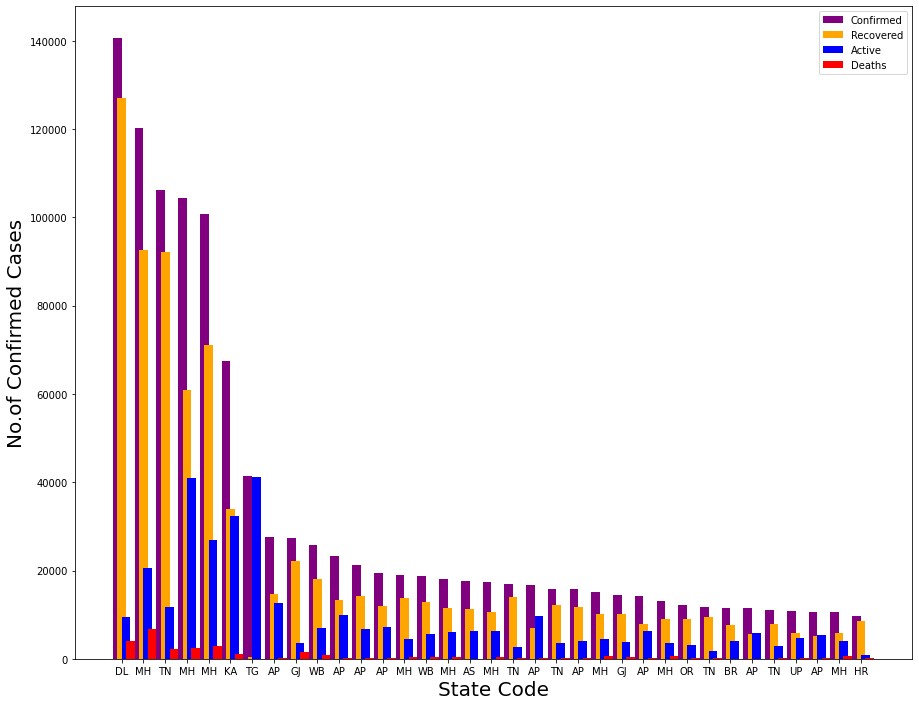

In [ ]:
# Bar Plot relating Confirmed , Recovered , Active & Deaths of top 35 :
ind = np.arange(35)
width = 0.4

plt.figure(figsize=(15,12))
x = top35['State_Code']
y = top35['Confirmed']
plt.bar(ind+width/2,y,align='edge',width=width,label="Confirmed", color='Purple')
y = top35['Recovered']
plt.bar(ind+width,y,align='edge',width=width,label="Recovered", color='orange')
y = top35['Active']
plt.bar(ind+3*width/2,y,align='edge',width=width,label="Active",color='Blue')
y = top35['Deaths']
plt.bar(ind+2*width,y,align='edge',width=width,label="Deaths", color='Red')

plt.xticks(ind + 3*width/2, x)
plt.xlabel('State Code',fontsize=20)
plt.ylabel('No.of Confirmed Cases',fontsize=20)
plt.legend();

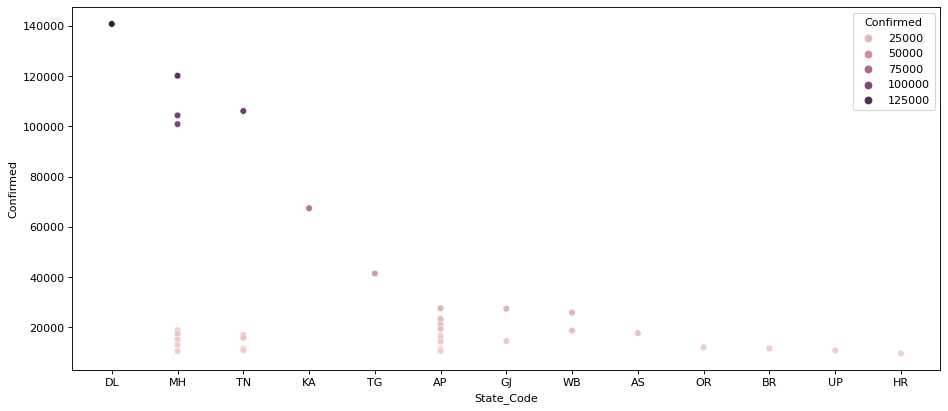

In [ ]:
# Displaying sctter plot showing the spread of the confirmed cases of the state 
plt.figure(figsize=(14,6), dpi= 80)
sc = sns.scatterplot(x='State_Code', y ='Confirmed',data = top35, hue = 'Confirmed')

In [ ]:
district_data .iloc[:,1:].corr().style.background_gradient(cmap='Blues').format("{:.3f}")

,Confirmed,Active,Recovered,Deaths,Migrated_Other,Delta_Confirmed,Delta_Active,Delta_Recovered,Delta_Deceased
Confirmed,1.000,0.661,0.946,0.900,0.417,0.688,0.554,0.665,0.744
Active,0.661,1.000,0.631,0.530,0.205,0.710,0.567,0.589,0.603
Recovered,0.946,0.631,1.000,0.900,0.412,0.542,0.437,0.565,0.650
Deaths,0.900,0.530,0.900,1.000,0.704,0.483,0.403,0.514,0.742
Migrated_Other,0.417,0.205,0.412,0.704,1.000,0.146,0.024,0.140,0.459
Delta_Confirmed,0.688,0.710,0.542,0.483,0.146,1.000,0.651,0.766,0.732
Delta_Active,0.554,0.567,0.437,0.403,0.024,0.651,1.000,0.775,0.691
Delta_Recovered,0.665,0.589,0.565,0.514,0.140,0.766,0.775,1.000,0.704
Delta_Deceased,0.744,0.603,0.650,0.742,0.459,0.732,0.691,0.704,1.000


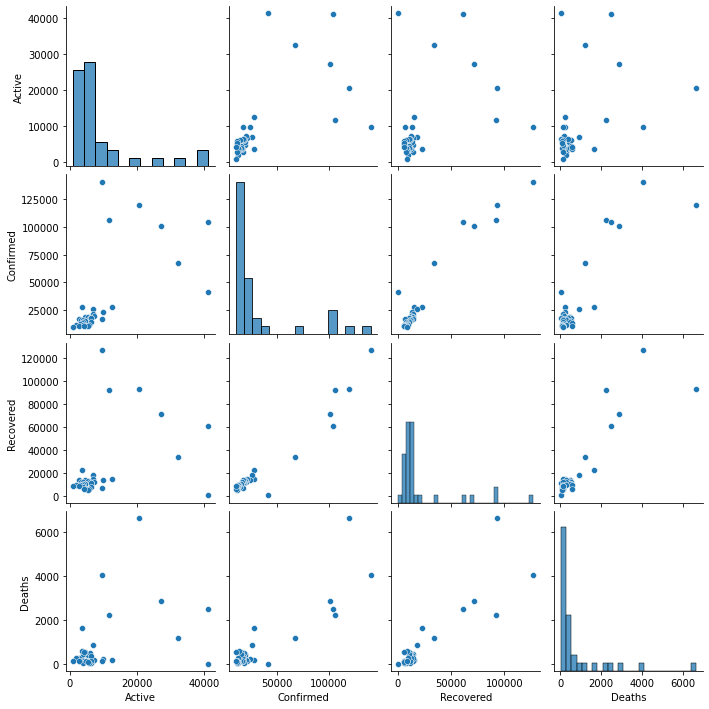

In [ ]:
x=sns.pairplot(top35 [['Active','Confirmed','Recovered','Deaths']],diag_kind='hist')

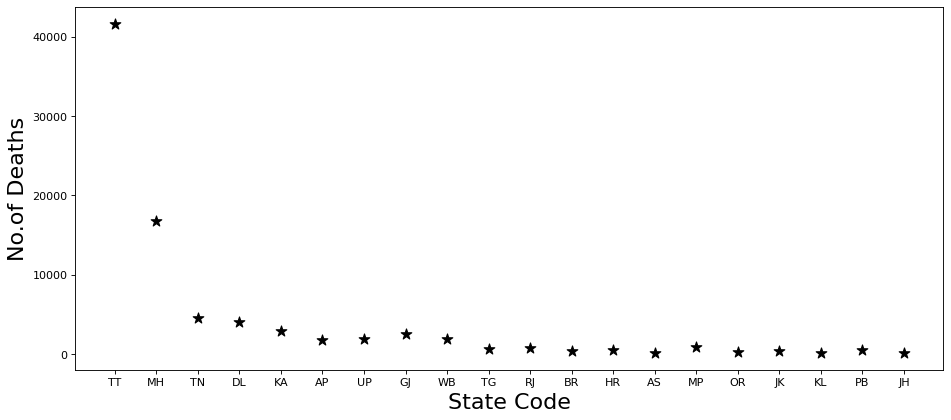

In [ ]:
# Scatter plot relating Deaths in state level
plt.figure(figsize=(14,6), dpi= 80)
x_s = state_data.head(20)['State_code'] #statecode of state_data
x = state_data.head(20)['Deaths']
plt.xlabel('State Code',fontsize=20)
plt.ylabel('No.of Deaths',fontsize=20)
plt.scatter(x_s , x , s=100, c='black', marker='*')

Text(0, 0.5, 'No.of Deaths')

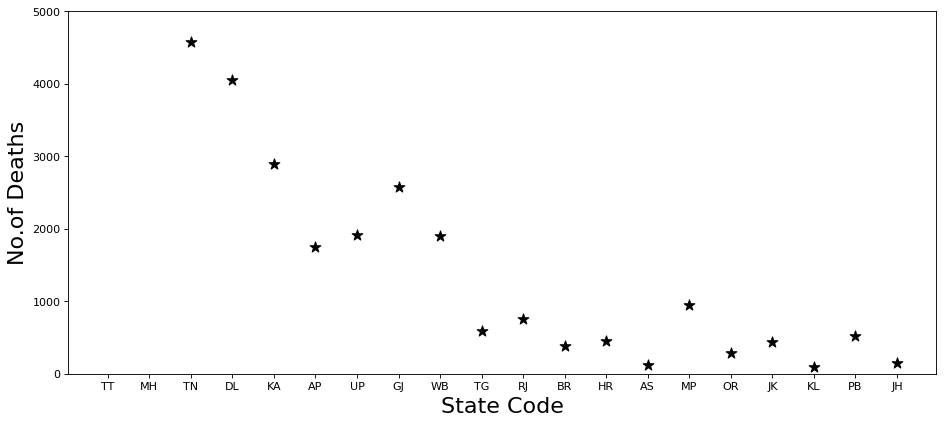

In [ ]:
plt.figure(figsize=(14,6), dpi= 80)
plt.scatter(x_s , x , s=100, c='black', marker='*')
plt.ylim(0,5000)
plt.xlabel('State Code',fontsize=20)
plt.ylabel('No.of Deaths',fontsize=20)

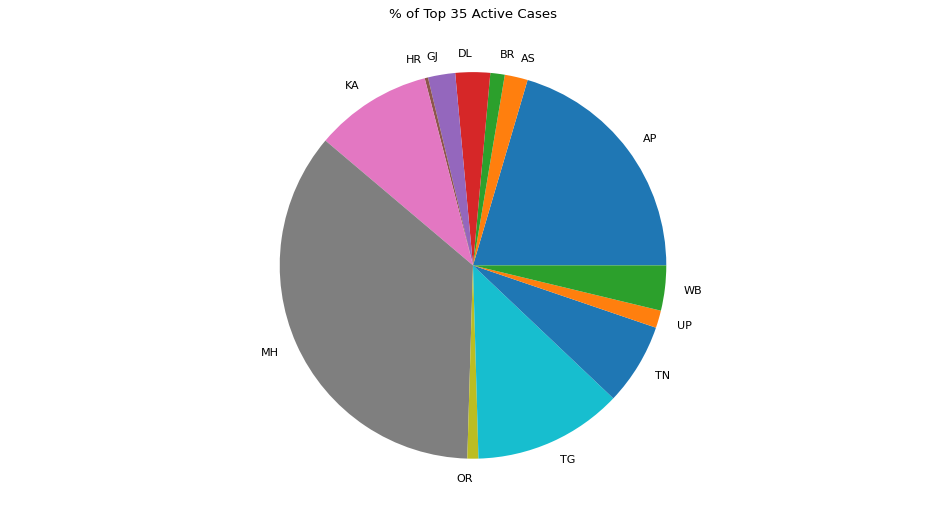

In [ ]:

plt.figure(figsize=(15,8), dpi= 80)
sums = top35.groupby(top35['State_Code'])['Active'].sum()
axis('equal');
pie(sums, labels=sums.index);
plt.title("% of Top 35 Active Cases")
show()

In [ ]:
plt.figure(figsize=(20,20), dpi= 80)
data_plot=pd.DataFrame({'labels': covid_data['Name of State / UT'],'counts': covid_data['Death']})
data_plot.iplot(kind='pie',labels='labels',values='counts',title="% Death  According to State")
plt.show()

<Figure size 1600x1600 with 0 Axes>

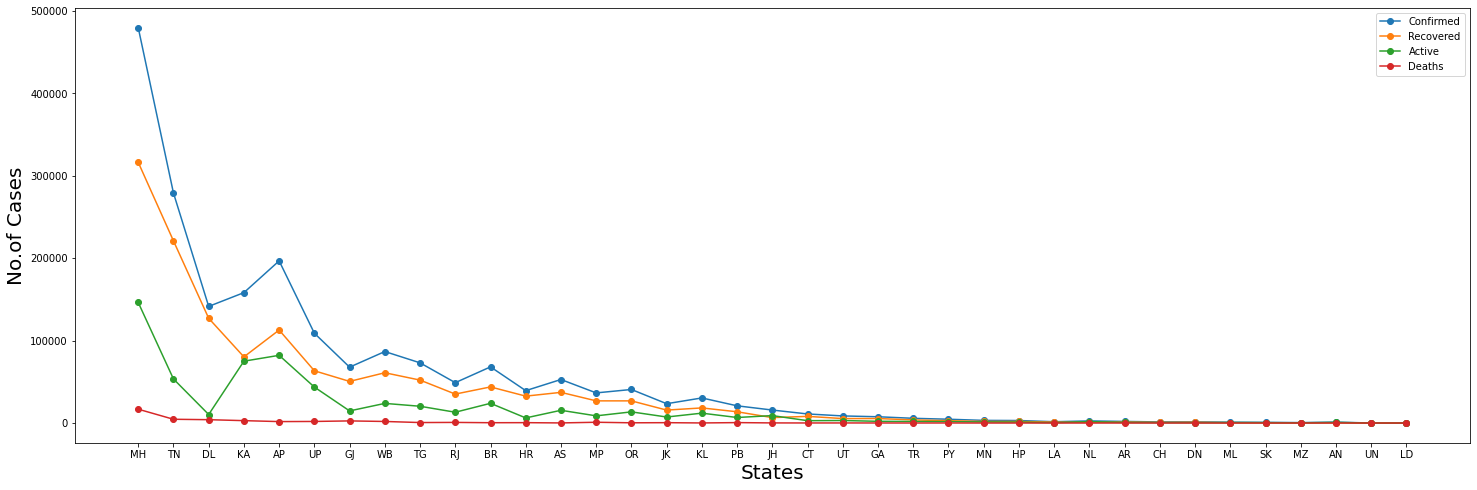

In [ ]:
#To drop the record of total column
state_data = state_data.drop(0)

plt.figure(figsize=(25,8))
x = state_data ['State_code']
y = state_data ['Confirmed']
plt.plot(x,y,marker='o',label="Confirmed")
y = state_data ['Recovered']
plt.plot(x,y,marker='o',label="Recovered")
y = state_data ['Active']
plt.plot(x,y,marker='o',label="Active")
y = state_data ['Deaths']
plt.plot(x,y,marker='o',label="Deaths")
plt.xlabel('States',fontsize=20)
plt.ylabel('No.of Cases',fontsize=20)
plt.legend();

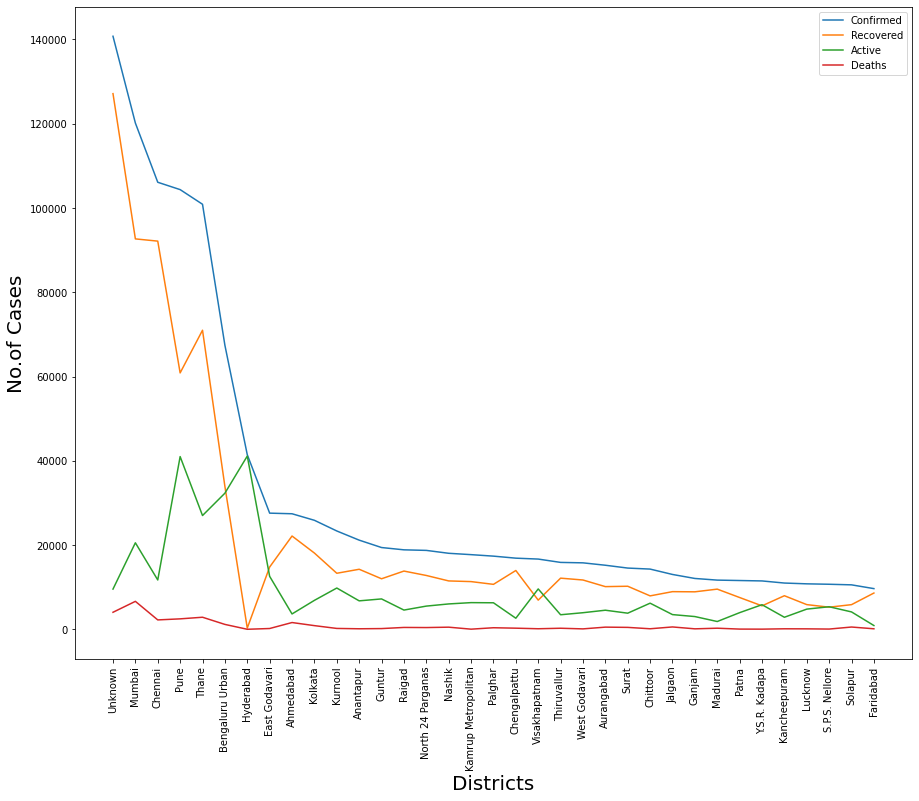

In [ ]:
# Line Graph of top 35
ind = np.arange(35)
width = 0.4

plt.figure(figsize=(15,12))
x = top35['District']
y = top35['Confirmed']
plt.plot(x,y,label="Confirmed")
y = top35['Recovered']
plt.plot(x,y,label="Recovered")
y = top35['Active']
plt.plot(x,y,label="Active")
y = top35['Deaths']
plt.plot(x,y,label="Deaths")
plt.xticks(rotation=90)
plt.xlabel('Districts',fontsize=20)
plt.ylabel('No.of Cases',fontsize=20)
plt.legend();


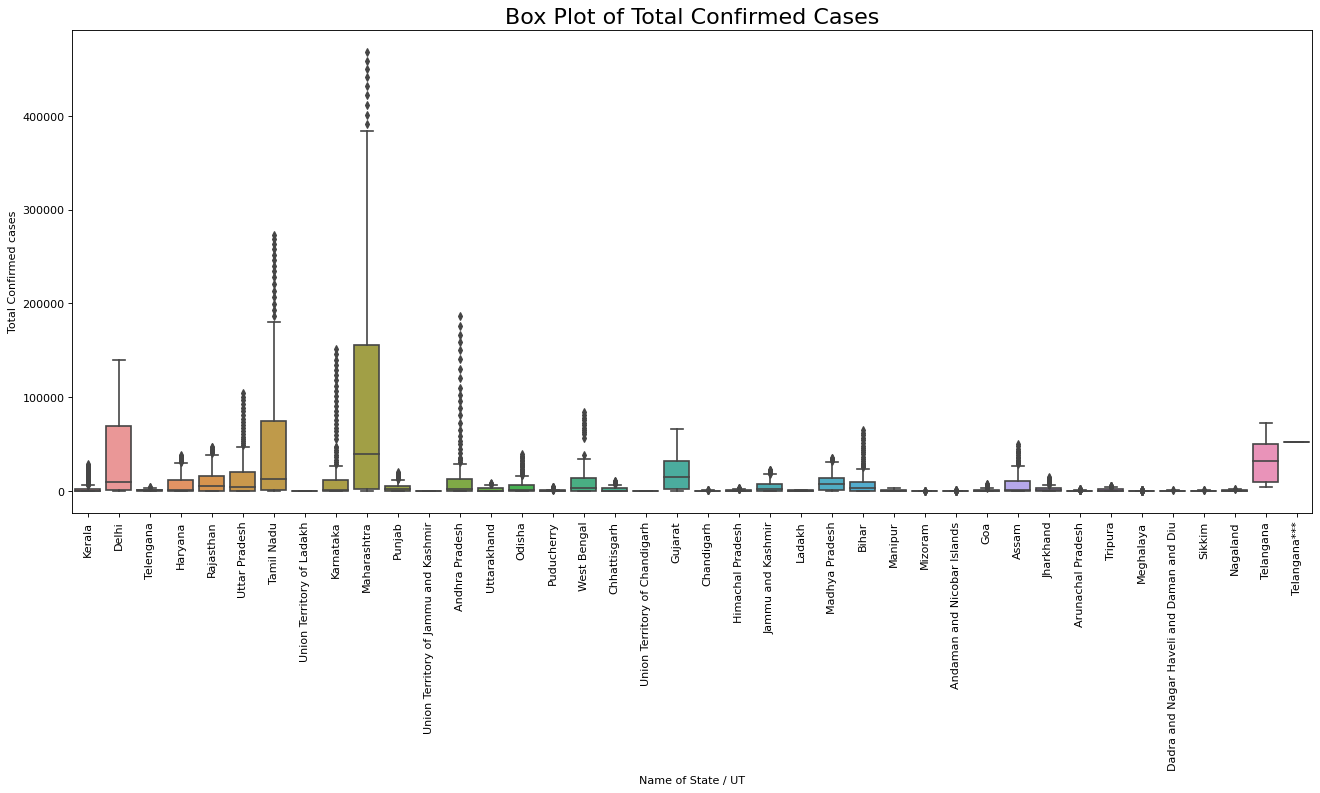

In [ ]:
plt.figure(figsize=(20,8), dpi= 80)
sns.boxplot(x='Name of State / UT', y='Total Confirmed cases', data=covid_data, notch=False)
plt.xticks(rotation=90)
plt.title('Box Plot of Total Confirmed Cases', fontsize=20)
plt.show()

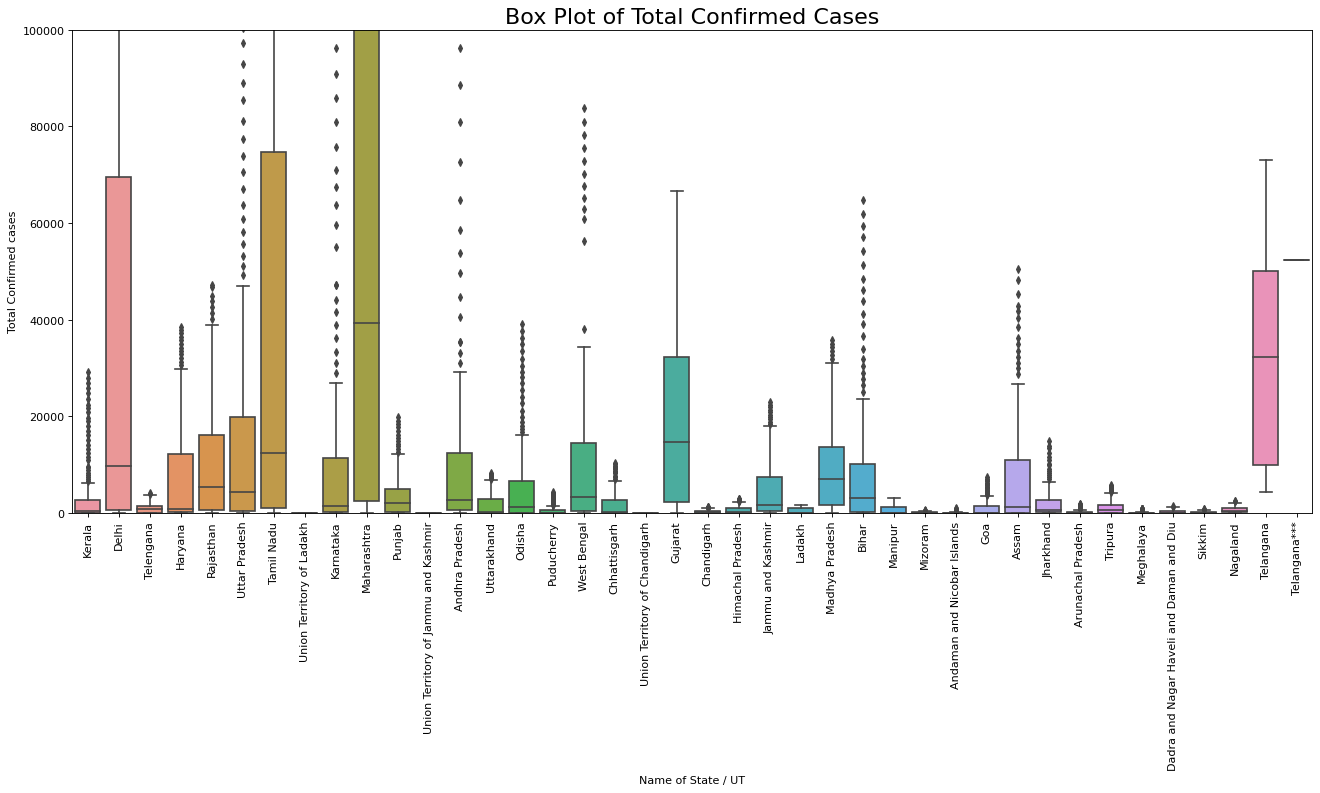

In [ ]:
plt.figure(figsize=(20,8), dpi= 80)
sns.boxplot(x='Name of State / UT', y='Total Confirmed cases', data=covid_data, notch=False)
plt.xticks(rotation=90)
plt.title('Box Plot of Total Confirmed Cases', fontsize=20)
plt.ylim(0,100000)
plt.show()

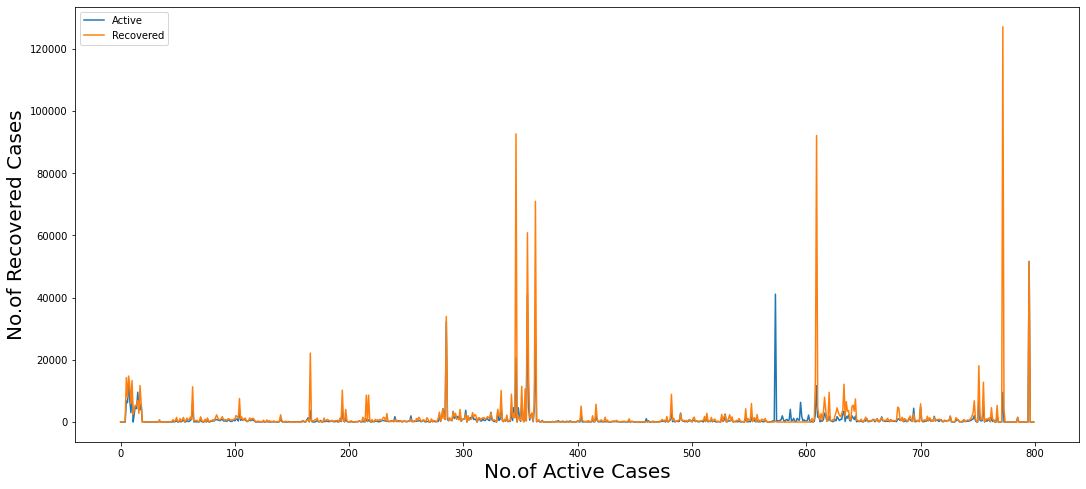

In [ ]:
#line graph showing changes in Active and Confirmed cases
fig = plt.figure(figsize = (18,8))
x=district_data ['Active']
y=district_data ['Recovered']
plt.plot(x, label='Active')
plt.plot(y, label='Recovered')
plt.legend()
plt.xlabel('No.of Active Cases',fontsize=20)
plt.ylabel('No.of Recovered Cases',fontsize=20)
plt.show()